<a href="https://colab.research.google.com/github/benedictlai/thinkful-challenges/blob/master/Unit_6_Specialization_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, adfuller, pacf
from statsmodels.tsa.arima_model import ARIMA

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/benedictlai/thinkful-challenges/master/A191RL1Q225SBEA.csv')
data.head(10)

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8
5,1948-07-01,2.3
6,1948-10-01,0.4
7,1949-01-01,-5.4
8,1949-04-01,-1.4
9,1949-07-01,4.2


# Time Series Plot

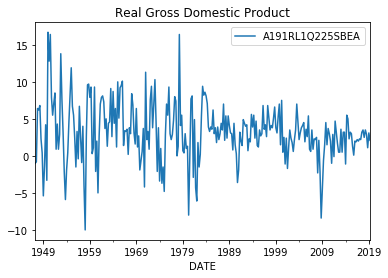

In [24]:
data.index = pd.to_datetime(data.DATE)
data.plot()
plt.title('Real Gross Domestic Product')
plt.show()

# Differentiating a Stationary Datasets

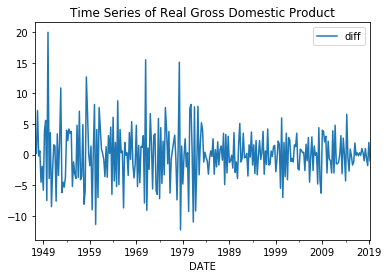

In [25]:
data['diff'] = data.A191RL1Q225SBEA - data.A191RL1Q225SBEA.shift(periods=1)
data.plot(y='diff')
plt.title('Time Series of Real Gross Domestic Product')
plt.show()

In [29]:
x = data['A191RL1Q225SBEA']
result = adfuller(x)
print('Here are the data results:')
print('The ADF Statistic is: %f' % result[0])
print('p-value: %f' % result[1])

diff = data['diff'].iloc[1:]
result = adfuller(diff)
print('\nDifferenced Data:')
print('The ADF Statistic is: %f' % result[0])
print('The p-value is: %f' % result[1])

Here are the data results:
The ADF Statistic is: -8.457495
p-value: 0.000000

Differenced Data:
The ADF Statistic is: -7.807123
The p-value is: 0.000000


Both p-values are less than 0.05. Therefore, there is significant difference with the data set and we can reject the null hypothesis.

# ACF

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


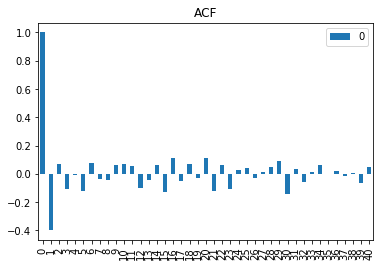

In [27]:
acf = pd.DataFrame(acf(diff))
acf.plot(kind='bar')
plt.title('ACF')
plt.show()

# PACF

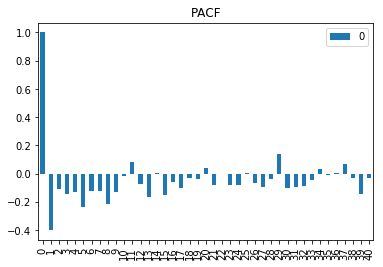

In [28]:
pacf = pd.DataFrame(pacf(diff))
pacf.plot(kind='bar')
plt.title('PACF')
plt.show()

# ARIMA - "0,1,0", "1,1,1", and "2,1,2"

# 0,1,0

In [11]:
ARIMA010 = ARIMA(data['A191RL1Q225SBEA'], order=(0,1,0))
ARIMA010fit = ARIMA010.fit()
print(ARIMA010fit.summary())
print('Residuals')
print(ARIMA010fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -831.876
Method:                           css   S.D. of innovations              4.347
Date:                Sun, 08 Sep 2019   AIC                           1667.751
Time:                        00:33:08   BIC                           1675.077
Sample:                    07-01-1947   HQIC                          1670.687
                         - 04-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.256      0.042      0.967      -0.491       0.513
Residuals
count    2.880000e+02
mean    -6.913715e-08
std      4.354707e+00
min     -1.231076e+01
25%     -2.835764e+00
50%     -1.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


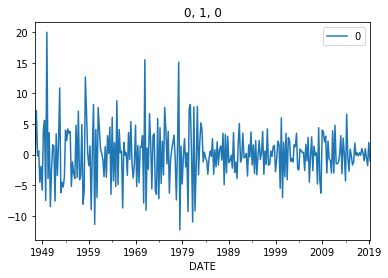

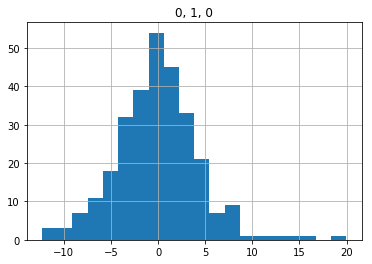

In [16]:
resid010 = pd.DataFrame(ARIMA010fit.resid)
resid010.plot(legend=True)
plt.title('0, 1, 0')

resid010.hist(bins=20)
plt.title('0, 1, 0')

plt.show()

# "1,1,1"

In [12]:
ARIMA111 = ARIMA(data['A191RL1Q225SBEA'], order=(1,1,1))
ARIMA111fit = ARIMA111.fit()
print(ARIMA111fit.summary())
print('Residuals')
print(ARIMA111fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -777.142
Method:                       css-mle   S.D. of innovations              3.564
Date:                Sun, 08 Sep 2019   AIC                           1562.284
Time:                        00:33:31   BIC                           1576.936
Sample:                    07-01-1947   HQIC                          1568.156
                         - 04-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0077      0.004     -2.019      0.044      -0.015      -0.000
ar.L1.D.A191RL1Q225SBEA     0.3443      0.056      6.183      0.000       0.235       0.454


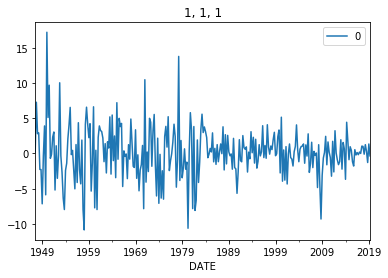

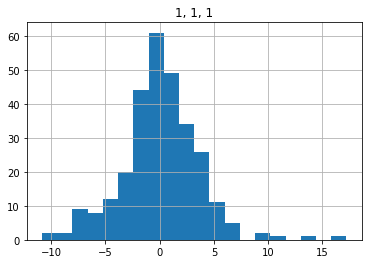

In [18]:
resid111 = pd.DataFrame(ARIMA111fit.resid)
resid111.plot(legend=True)
plt.title('1, 1, 1')

resid111.hist(bins=20)
plt.title('1, 1, 1')

plt.show()

# 2, 1, 2

In [13]:
ARIMA212 = ARIMA(data['A191RL1Q225SBEA'], order=(2,1,2))
ARIMA212fit = ARIMA212.fit()
print(ARIMA212fit.summary())
print('Residuals')
print(ARIMA212fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -774.300
Method:                       css-mle   S.D. of innovations              3.530
Date:                Sun, 08 Sep 2019   AIC                           1560.600
Time:                        00:33:42   BIC                           1582.577
Sample:                    07-01-1947   HQIC                          1569.407
                         - 04-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0076      0.004     -1.844      0.066      -0.016       0.000
ar.L1.D.A191RL1Q225SBEA    -0.2590      0.272     -0.953      0.341      -0.792       0.274


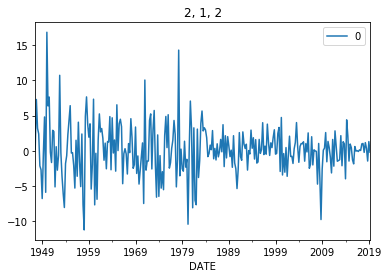

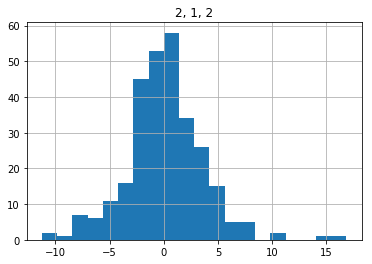

In [19]:
resid212 = pd.DataFrame(ARIMA212fit.resid)
resid212.plot(legend=True)
plt.title('2, 1, 2')

resid212.hist(bins=20)
plt.title('2, 1, 2')

plt.show()

All the residuals above are evenly distributed.

# Based on information loss, which is the best model of the three?



In [21]:
A010 = 1667.751
A111 = 1562.284
A212 = 1560.600

loss111 = np.exp((A212 - A111) / 2)
loss010 = np.exp((A212 - A010) / 2)

print(loss111)
print(loss010)
print("A11 is the best choice.")

0.43084796522789975
5.400773758178954e-24
A11 is the best choice.
